> This is a self-correcting activity generated by [nbgrader](https://nbgrader.readthedocs.io). Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Linear Regression

In this activity, you'll code various linear regression algorithms and compare them to some of scikit-learn's linear regressors.

## Package setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%autosave 0

Autosave disabled


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Import ML packages
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')

from sklearn.linear_model import LinearRegression, SGDRegressor

scikit-learn version: 0.22.2.post1


## Generate planar data

In [4]:
true_intercept = 4
true_slope = 3

# Generate linear-looking data with noise
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# add x0 = 1 to each sample
X = np.c_[np.ones((100, 1)), X]

print(f'X: {X.shape}. y: {y.shape}')

X: (100, 2). y: (100, 1)


(0.0, 2.0, 0.0, 15.0)

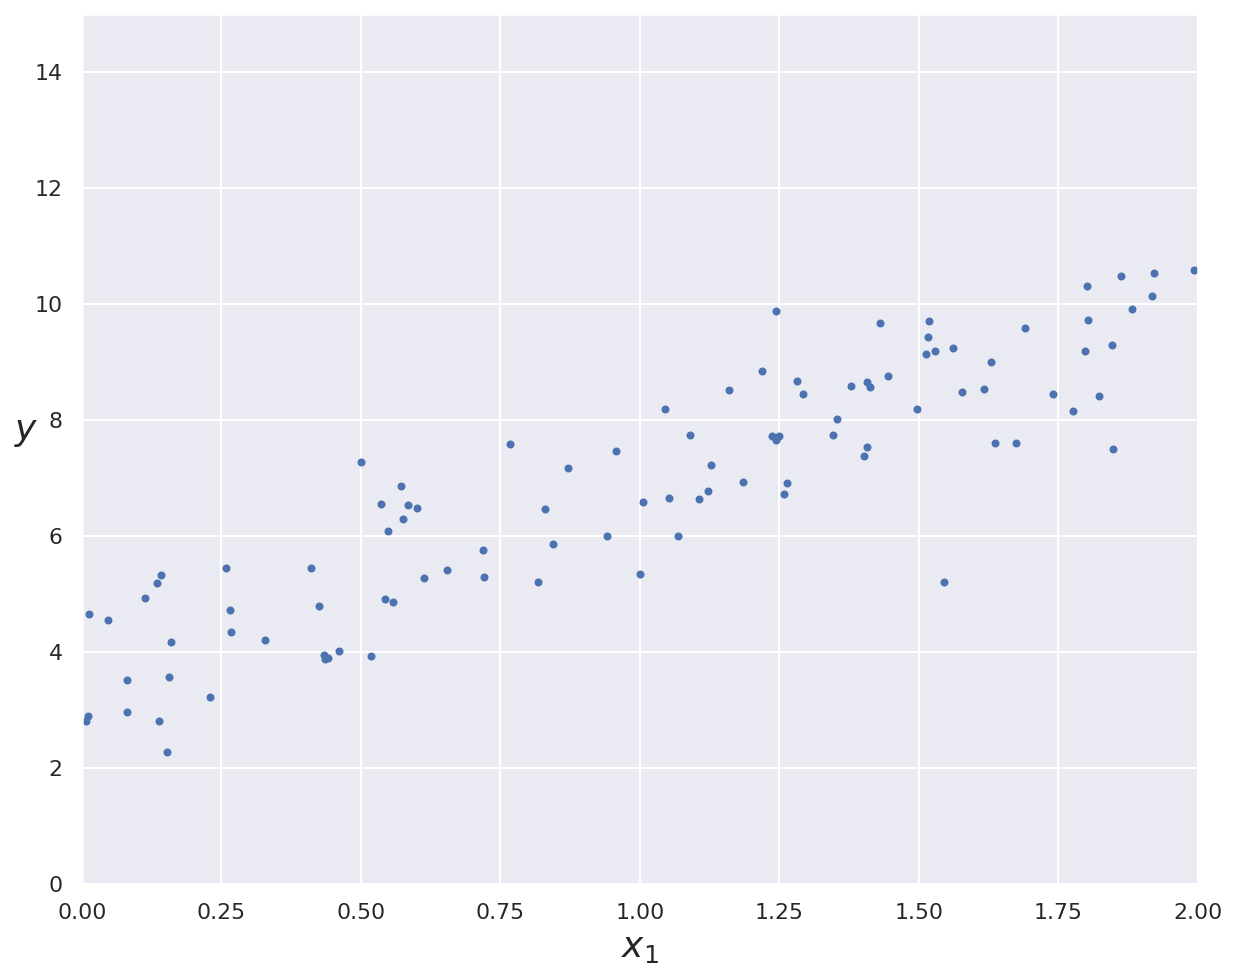

In [5]:
# Plot data (only x1)
plt.plot(X[:,1], y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

## Analytical Approach

### Question

Using the normal equation, compute the theta vector that minimizes loss into the `theta_best` variable.

In [7]:
# You may use the np.linalg package for matrix operations

theta_best = np.linalg.lstsq(X, y)
theta_best

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([[3.58587858],
        [3.24140739]]),
 array([89.84708473]),
 2,
 array([14.76196867,  3.9367499 ]))

In [ ]:
normal_intercept = theta_best[0][0]
normal_slope = theta_best[1][0]
print(f'Intercept: {normal_intercept}. Slope: {normal_slope}')

assert np.abs(true_intercept - normal_intercept) < 0.5
assert np.abs(true_slope - normal_slope) < 0.5

In [ ]:
# Generate 2 test samples
X_test = np.array([[0], [2]])
# add x0 = 1 to each sample
X_test = np.c_[np.ones((2, 1)), X_test]

### Question

Use the model to predict values for the test samples. Store the result in variable `y_pred`.

In [ ]:
# YOUR CODE HERE

In [ ]:
print(f'y_pred: {y_pred}')

In [ ]:
plt.plot(X_test[:,1], y_pred, "r-", linewidth=2, label="Predictions")
plt.plot(X[:,1], y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

### Question

Create a scikit-learn `LinearRegression` into the variable `model`. Use it to fit the data.

Afterwards, compare its paramaters to those of your regressor.

In [ ]:
# YOUR CODE HERE

In [ ]:
sklearn_intercept = model.intercept_[0]
sklearn_slope = model.coef_[0][1]
print(f'Intercept: {sklearn_intercept}. Slope: {sklearn_slope}')

assert np.abs(sklearn_intercept - normal_intercept) < 0.5
assert np.abs(sklearn_slope - normal_slope) < 0.5

### Question

Use the scikit-learn model to predict and print values for the test samples.

In [ ]:
# YOUR CODE HERE

## Iterative Approach: Batch Gradient Descent

### Question

Complte the following function to implement Mean Squared Error loss.

In [ ]:
def mse(y_true, y_pred):
    # YOUR CODE HERE

### Question

Complte the following code to implement batch gradient descent on the dataset, using the given hyperparameters.

Print the loss value every 10 iterations.

In [ ]:
eta = 0.1 # learning rate
n_iterations = 100
m = 100

theta_batch = np.random.randn(2,1) # random initialization
print(f'Initial cost: {mse(y, X.dot(theta_batch))}')

# YOUR CODE HERE

In [ ]:
batch_intercept = theta_batch[0][0]
batch_slope = theta_batch[1][0]
print(f'Intercept: {batch_intercept}. Slope: {batch_slope}')

assert np.abs(true_intercept - batch_intercept) < 0.5
assert np.abs(true_slope - batch_slope) < 0.5

## Iterative Approach: Stochastic Gradient Descent

### Question

Complte the following code to implement stochastic gradient descent on the dataset, using the given hyperparameters.

Print the loss value every 25 iterations.

In [ ]:
eta = 0.01 # learning rate
n_iterations = 500
m = 100

theta_stochastic = np.random.randn(2,1) # random initialization
print(f'Initial cost: {mse(y, X.dot(theta_stochastic))}')

# YOUR CODE HERE

In [ ]:
stochastic_intercept = theta_batch[0][0]
stochastic_slope = theta_batch[1][0]
print(f'Intercept: {stochastic_intercept}. Slope: {stochastic_slope}')

assert np.abs(true_intercept - stochastic_intercept) < 0.5
assert np.abs(true_slope - stochastic_slope) < 0.5

### Question

Create a scikit-learn `SGDRegressor` into the variable `model`. Use it to fit the data with the same hyperparameters as before.

Afterwards, compare its paramaters to those of your regressor.

In [ ]:
# YOUR CODE HERE

In [ ]:
sklearn_intercept = model.intercept_[0]
sklearn_slope = model.coef_[0][1]
print(f'Intercept: {sklearn_intercept}. Slope: {sklearn_slope}')

assert np.abs(sklearn_intercept - normal_intercept) < 0.5
assert np.abs(sklearn_slope - normal_slope) < 0.5

## TODO

- Add assertions for model predictions.
- Implement mini-batch SGD.